## Bank Customer Churn

#### Dataset xếp hạng khách hàng rời hày không rời ngân hàng, mục đích là dự đoán khách hàng nào sẽ rời ngân hàng

#### Dataset có 10000 dòng ​​and 18 cột

In [2]:
import numpy as np 
import pandas as pd

#### Importing Libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Importing Dataset

In [4]:
df = pd.read_csv('data/Customer-Churn-Records.csv')

#### categorical & continuous variables, không có null values.

- RowNumber: Số thứ tự của từng hàng, không ảnh hưởng đến kết quả đầu ra.
- CustomerId: Chứa các giá trị ngẫu nhiên và không ảnh hưởng đến việc khách hàng rời ngân hàng.
- Surname: Họ của khách hàng, không tác động đến quyết định rời ngân hàng của họ.
- CreditScore: Có thể ảnh hưởng đến việc khách hàng rời đi, vì khách hàng có điểm tín dụng cao thường ít có khả năng rời ngân hàng hơn.
- Geography: Vị trí địa lý của khách hàng có thể ảnh hưởng đến quyết định rời ngân hàng của họ.
- Gender: Thật thú vị khi xem xét liệu giới tính có vai trò gì trong việc khách hàng rời ngân hàng hay không.
- Age: Chắc chắn có liên quan, vì khách hàng lớn tuổi thường ít rời ngân hàng hơn so với những người trẻ tuổi.
- Tenure: Chỉ số năm mà khách hàng đã là khách hàng của ngân hàng. Thông thường, khách hàng lâu năm trung thành hơn và ít có khả năng rời đi.
- Balance: Cũng là một chỉ số rất tốt về việc khách hàng rời đi, vì những người có số dư tài khoản cao thường ít rời ngân hàng hơn so với những người có số dư thấp.
- NumOfProducts: Số lượng sản phẩm mà khách hàng đã mua qua ngân hàng.
- HasCrCard: Cho biết khách hàng có thẻ tín dụng hay không. Cột này cũng quan trọng, vì những người có thẻ tín dụng ít có khả năng rời ngân hàng hơn.
- IsActiveMember: Khách hàng tích cực thường ít rời ngân hàng hơn.
- EstimatedSalary: Tương tự như số dư, những người có lương thấp có khả năng rời ngân hàng cao hơn so với những người có lương cao.
- Exited: Khách hàng có rời ngân hàng hay không.
- Complain: Khách hàng có khiếu nại hay không.
- Satisfaction Score: Điểm hài lòng do khách hàng cung cấp về việc giải quyết khiếu nại của họ.
- Card Type: Loại thẻ mà khách hàng đang sở hữu.
- Points Earned: Điểm mà khách hàng kiếm được khi sử dụng thẻ tín dụng.

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
(df.isnull().sum()/len(df))

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

## 2. Data Analysis

#### Xác minh mối tương quan giữa các biến
- Loại bỏ RowNumber, CustomerID và Surname
- Khi xem xét mối tương quan giữa các biến, có thể thấy biến mục tiêu có tương quan 100% với biến Complain, nên sẽ loại bỏ biến Complain

In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

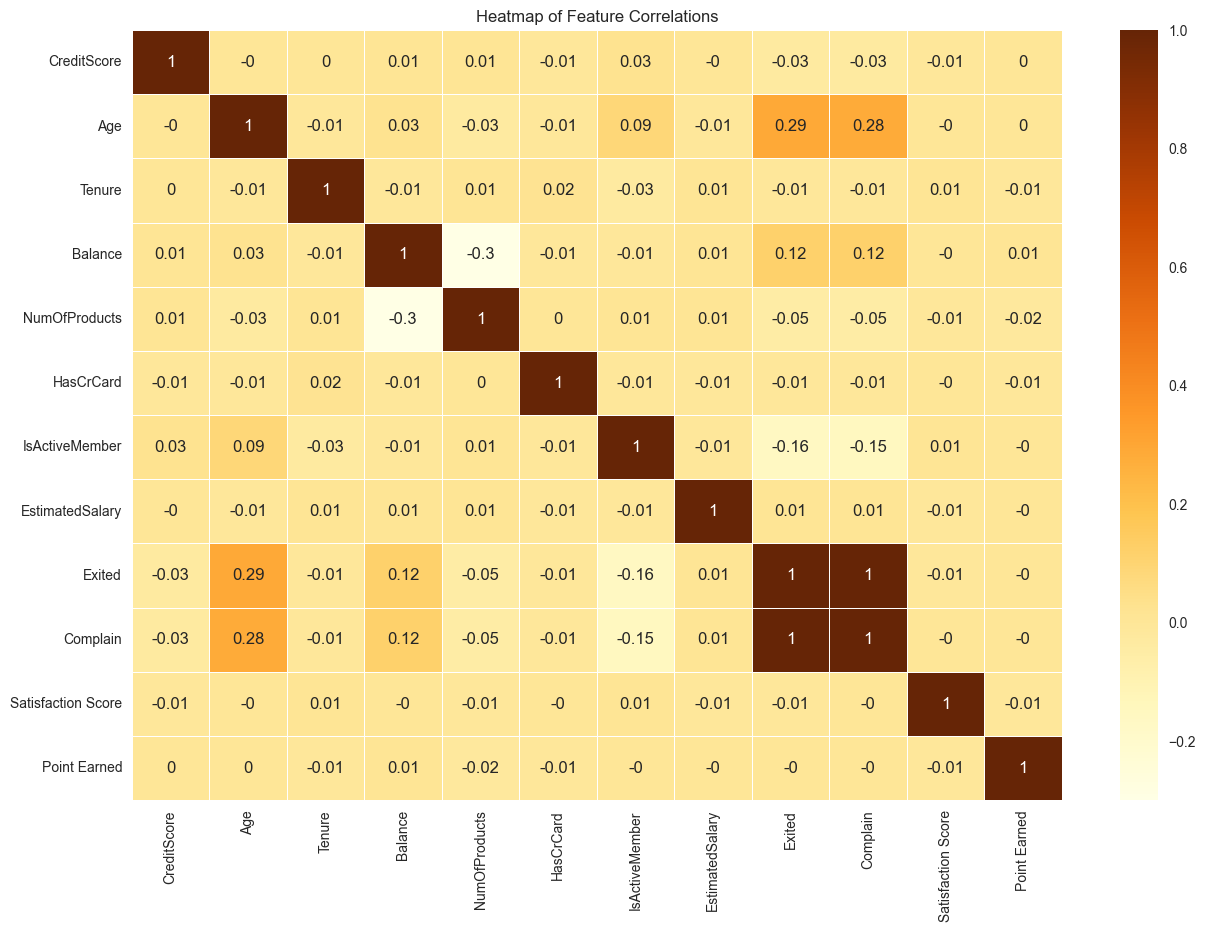

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr().round(2)

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [12]:
df = df.drop('Complain', axis = 1)

#### Categorical Variables.

#### Khi xem xét các biến phân loại, có thể thấy hầu hết các biến đều được phân bố tốt. Khách hàng chủ yếu đến từ Pháp, biến giới tính được phân bố đồng đều, và thông thường họ sử dụng 1 hoặc 2 sản phẩm. Biến mục tiêu không được phân bố tốt, ta sẽ cần phải cân bằng các lớp.

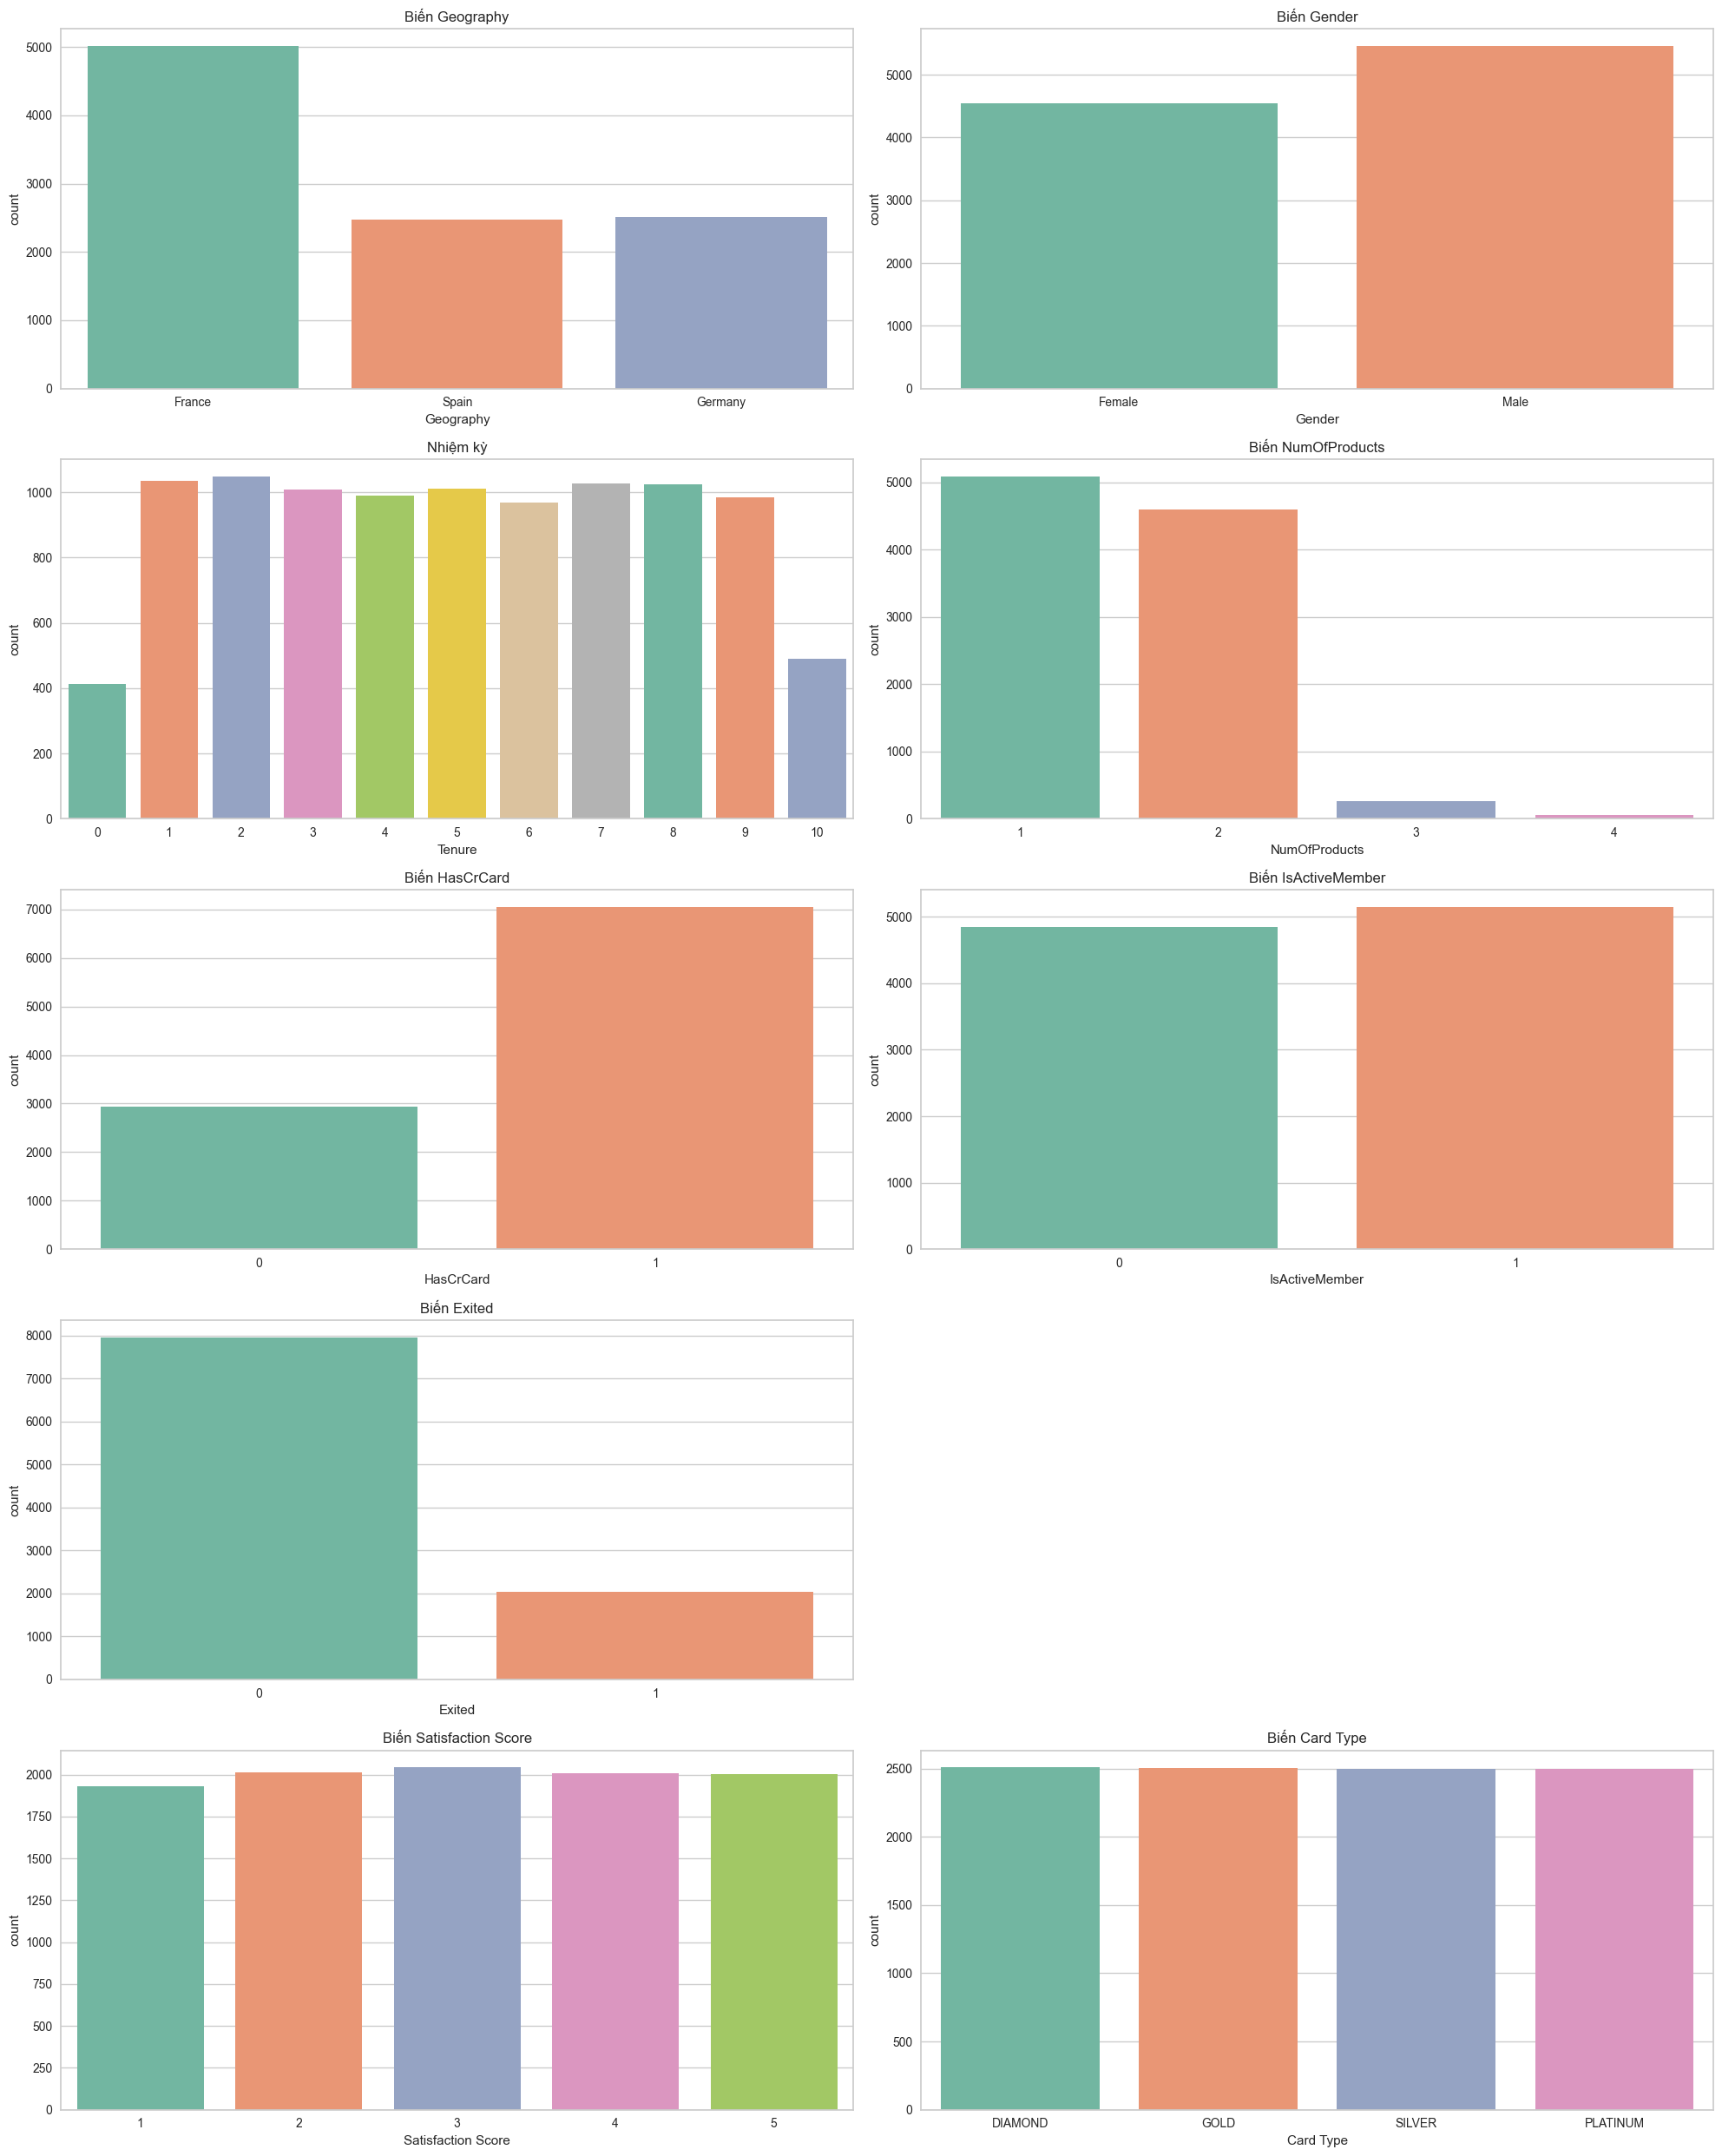

In [13]:
plt.figure(figsize=(20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Biến Geography')
sns.countplot(x='Geography', hue='Geography', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Biến Gender')
sns.countplot(x='Gender', hue='Gender', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Nhiệm kỳ')
sns.countplot(x='Tenure', hue='Tenure', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Biến NumOfProducts')
sns.countplot(x='NumOfProducts', hue='NumOfProducts', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Biến HasCrCard')
sns.countplot(x='HasCrCard', hue='HasCrCard', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Biến IsActiveMember')
sns.countplot(x='IsActiveMember', hue='IsActiveMember', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Biến Exited')
sns.countplot(x='Exited', hue='Exited', palette='Set2', legend=False, data=df)


plt.subplot(5, 2, 9)
plt.gca().set_title('Biến Satisfaction Score')
sns.countplot(x='Satisfaction Score', hue='Satisfaction Score', palette='Set2', legend=False, data=df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Biến Card Type')
sns.countplot(x='Card Type', hue='Card Type', palette='Set2', legend=False, data=df)

plt.tight_layout()
plt.show()

#### Continuous Variables.

#### Xem xét các biến liên tục hầu hết các biến đều được cân bằng tốt. Chẳng hạn biến EstimatedSalary, số lượng người ở mỗi khoảng lương gần như tương đương. Biến PointsEarned cũng thế. Khi xem xét biến CreditScore và Age, chúng gần giống nhau, phân bố không hoàn toàn chuẩn. Còn với biến Balance, phần lớn dữ liệu đến từ những người không có tiền trong tài khoản, còn những người có tiền thì được phân bố khá cân bằng.

<Axes: xlabel='Point Earned', ylabel='Count'>

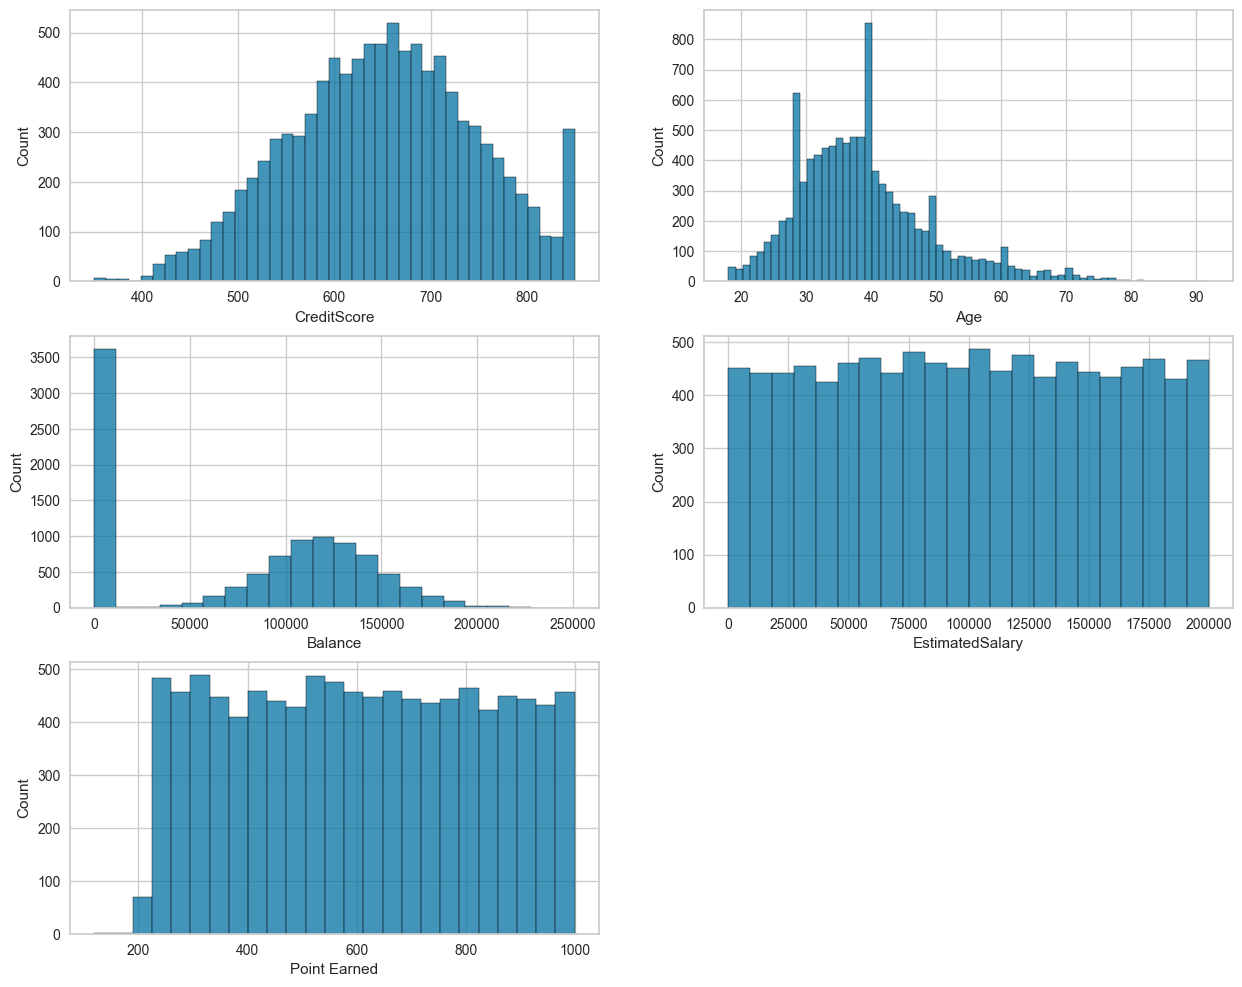

In [14]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'], kde = False)

#### Biểu đồ boxplot của các biến liên tục, có rất ít giá trị ngoại lai (outliers)

<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

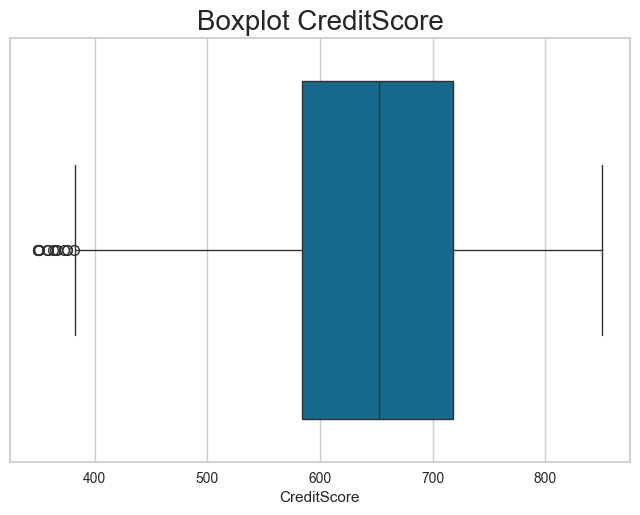

In [15]:
plt.title("Boxplot CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=df["CreditScore"])

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

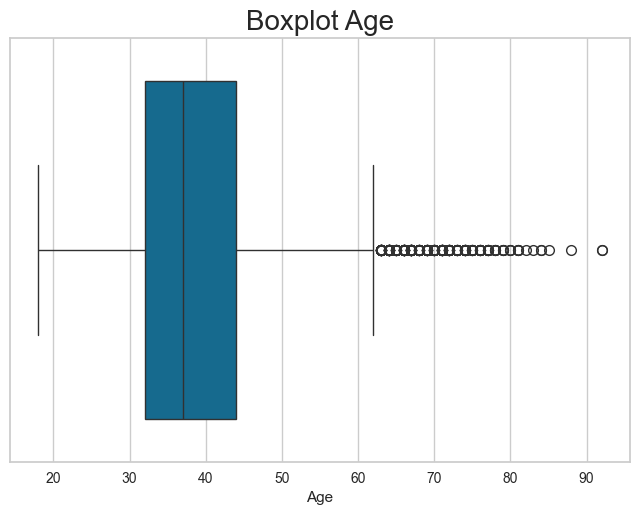

In [16]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

<Axes: title={'center': 'Boxplot Balance'}, xlabel='Balance'>

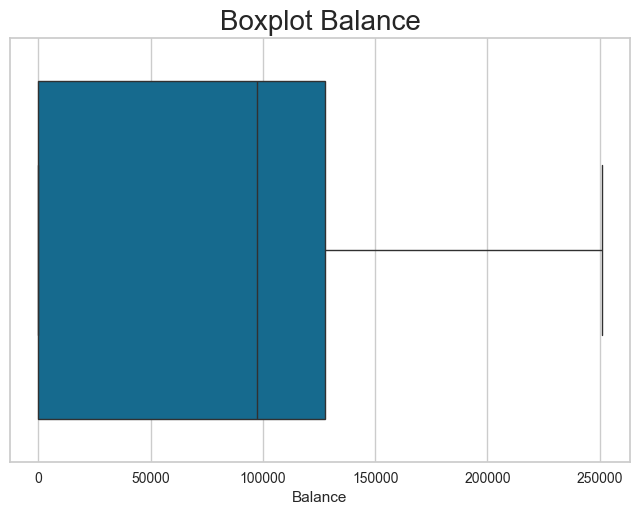

In [17]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Balance"])

<Axes: title={'center': 'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

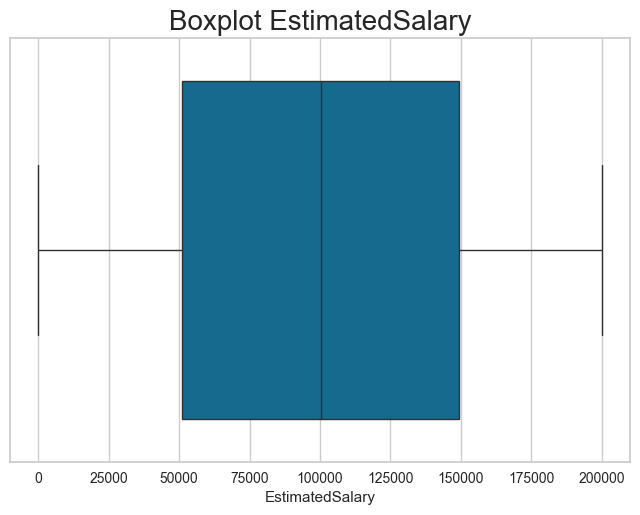

In [18]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df["EstimatedSalary"])

<Axes: title={'center': 'Boxplot Point Earned'}, xlabel='Point Earned'>

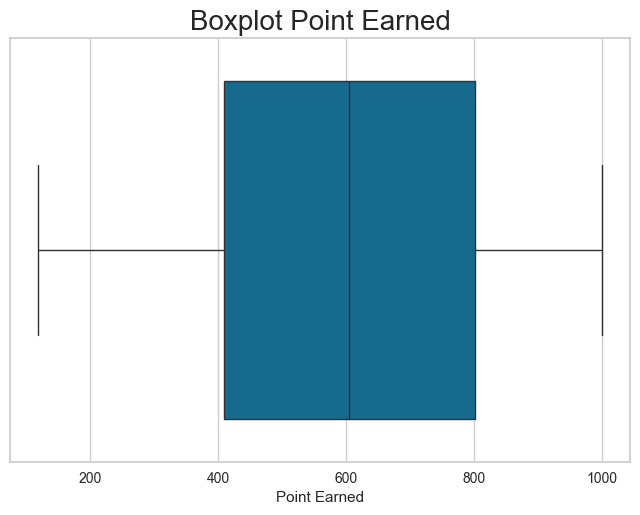

In [19]:
plt.title("Boxplot Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Point Earned"])

#### Song biến

#### So sánh các biến phân loại với biến mục tiêu. Không thấy bất kỳ biến nào có hành vi quá khác biệt giữa kết quả tích cực và tiêu cực.

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

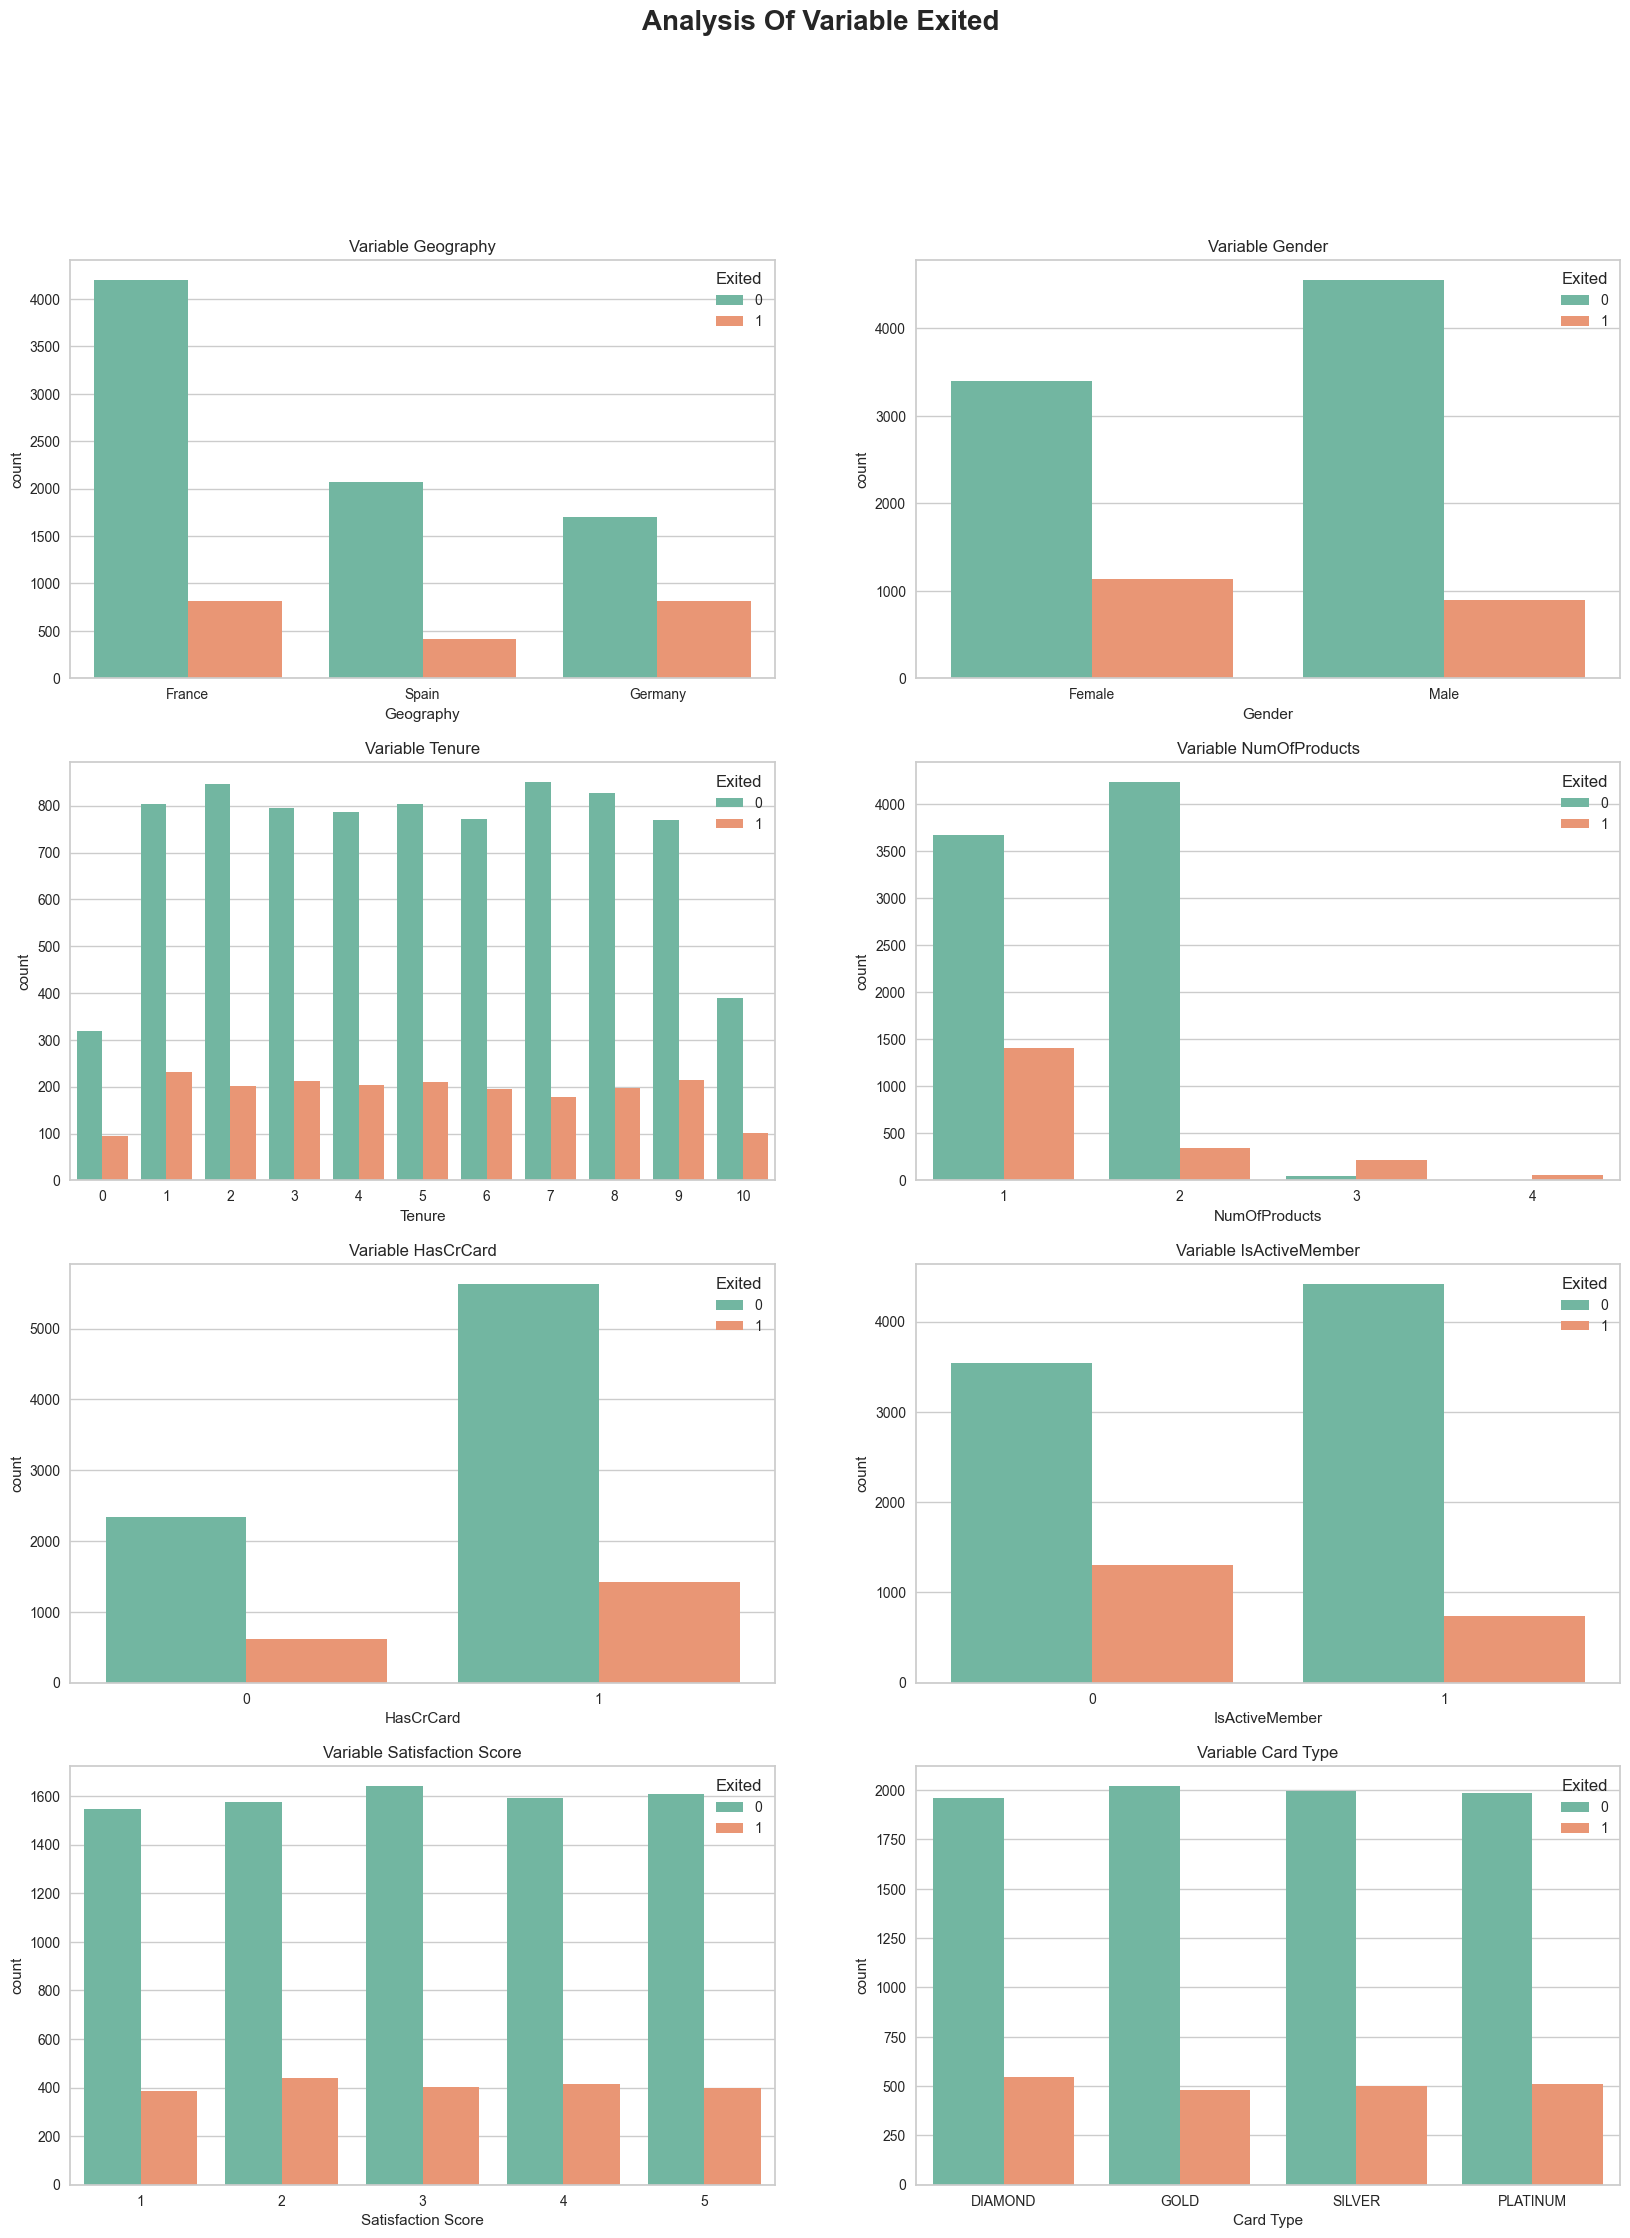

In [20]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

#### Khi xem xét các biến liên tục Age, những người lớn tuổi hơn có xu hướng cho kết quả tích cực hơn.

<Axes: xlabel='Exited', ylabel='Point Earned'>

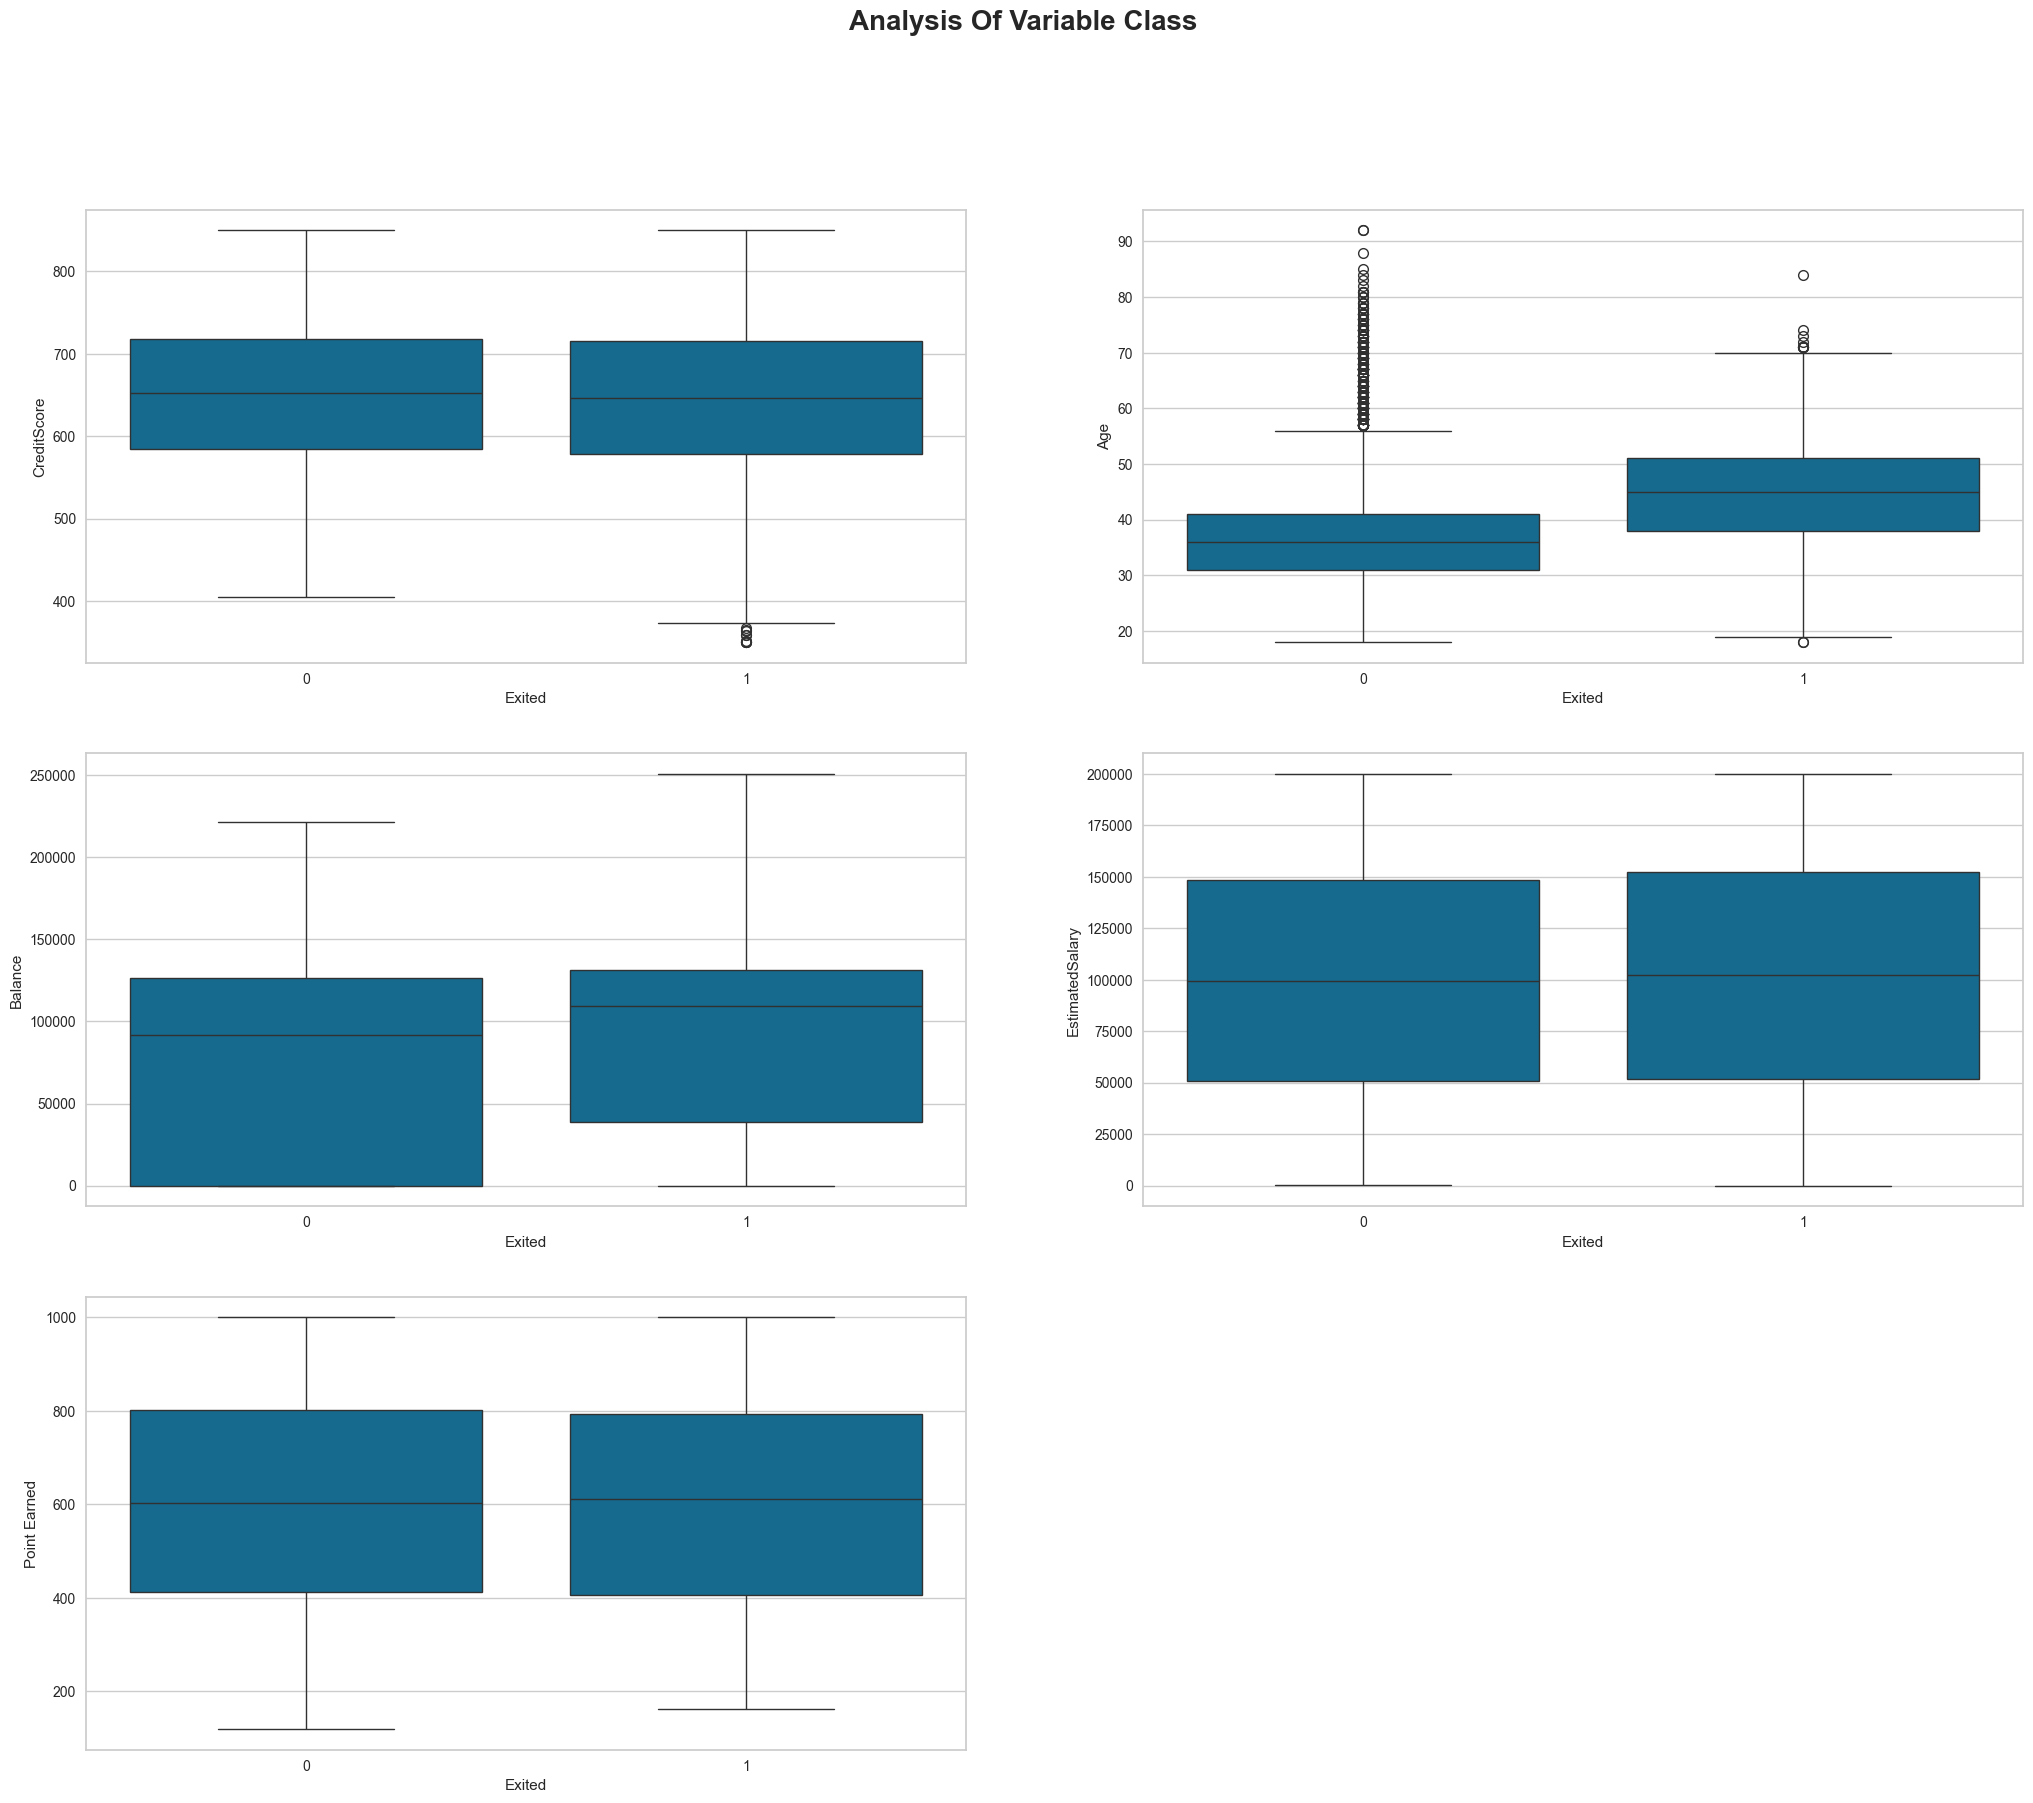

In [21]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

## 3. Model Building

#### OneHot Label Encoder
- Chuyển đổi biến phân loại thành biến liên tục

In [22]:
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])

In [23]:
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

#### Tách các features và target

In [24]:
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(
X_standard = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

model = RandomForestClassifier().fit(X, y)
result = permutation_importance(model, X, y, n_repeats=20, random_state=42)

for i in result.importances_mean.argsort()[::-1]:
    print(f"Feature {i}: Mean importance = {result.importances_mean[i]:.4f}, Std = {result.importances_std[i]:.4f}")

Feature 1: Mean importance = 0.1565, Std = 0.0025
Feature 4: Mean importance = 0.1065, Std = 0.0021
Feature 6: Mean importance = 0.0786, Std = 0.0014
Feature 3: Mean importance = 0.0745, Std = 0.0017
Feature 11: Mean importance = 0.0500, Std = 0.0012
Feature 7: Mean importance = 0.0382, Std = 0.0011
Feature 0: Mean importance = 0.0367, Std = 0.0010
Feature 9: Mean importance = 0.0360, Std = 0.0011
Feature 2: Mean importance = 0.0261, Std = 0.0007
Feature 13: Mean importance = 0.0250, Std = 0.0010
Feature 14: Mean importance = 0.0219, Std = 0.0010
Feature 8: Mean importance = 0.0214, Std = 0.0009
Feature 10: Mean importance = 0.0117, Std = 0.0007
Feature 5: Mean importance = 0.0080, Std = 0.0007
Feature 12: Mean importance = 0.0068, Std = 0.0006
Feature 15: Mean importance = 0.0064, Std = 0.0003
Feature 18: Mean importance = 0.0063, Std = 0.0004
Feature 17: Mean importance = 0.0053, Std = 0.0005
Feature 16: Mean importance = 0.0044, Std = 0.0004


#### Balancing Classes
- Vì có nhiều giá trị thuộc về một lớp và ít giá trị thuộc về các lớp khác, nên sẽ cân bằng các lớp bằng cách sử dụng OverSampling để đảm bảo các lớp được cân bằng

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

#### Naive Bayes
#### Chạy Gaussian Model.
- Sử dụng Naive Bayes Model, sẽ test Gaussian model, sử dụng Normal Data.-

- **Dữ liệu**: Các đặc trưng như `Age`, `NumOfProducts`, `Balance`, v.v., đã được tiền xử lý, loại bỏ cột không cần thiết (`RowNumber`, `CustomerId`, `Surname`, `Complain`) và mã hóa biến phân loại bằng **OneHotEncoder**.
- **Quy trình**:
  - Chia dữ liệu: 70% huấn luyện, 30% kiểm tra.
  - Huấn luyện mô hình **GaussianNB** và dự đoán trên tập kiểm tra.
- **Ưu điểm**:
  - Đơn giản, nhanh, hiệu quả với dữ liệu nhỏ.
  - Hoạt động tốt khi giả định độc lập gần đúng.
- **Nhược điểm**:
  - Giả định độc lập giữa các đặc trưng thường không thực tế.
  - Hiệu suất kém với dữ liệu mất cân bằng.

#### Hiệu suất:
- **Độ chính xác**: {score_naive_gaussian:.6f}
- **Nhận xét**:
  - Naive Bayes đạt độ chính xác trung bình, thấp hơn Random Forest.
  - Do biến mục tiêu (`Exited`) mất cân bằng (20.38% khách hàng rời), mô hình thiên về dự đoán lớp đa số (không rời).
  - Sau khi cân bằng dữ liệu, hiệu suất cải thiện nhưng không vượt trội.

#### Đề xuất cải thiện:
- Thử **Multinomial Naive Bayes** hoặc **Bernoulli Naive Bayes** với dữ liệu phù hợp.
- Kết hợp kỹ thuật cân bằng dữ liệu như **SMOTE**.



#### Trong model đầu tiên kết quả không thực sự tốt, chỉ đạt được độ chính xác 70,46%, mức này khá ổn

0.7106666666666667

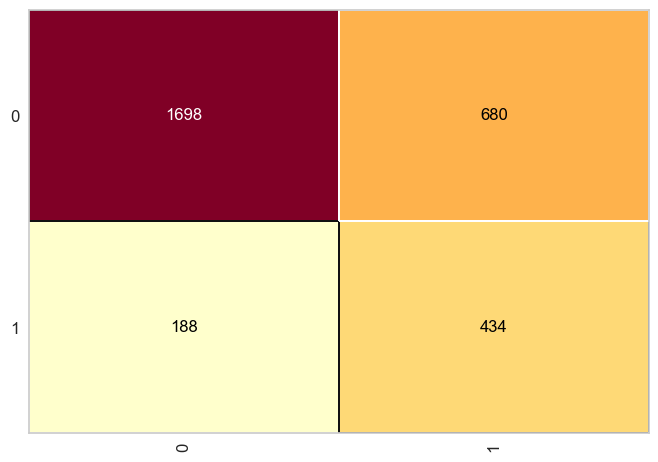

In [29]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [30]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2378
           1       0.39      0.70      0.50       622

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.65      3000
weighted avg       0.79      0.71      0.73      3000



In [31]:
score_naive_gaussian = 0.7046666666666667

#### Decision Tree

- Sử dụng Decision Tree Model, sẽ test tính Entropy với cả Gini
- Áp dụng GridSearch để check xem metrics nào tốt nhất

#### Mô tả thuật toán:
- **Decision Tree** xây dựng một cây quyết định, với mỗi nút là một điều kiện dựa trên đặc trưng và mỗi nhánh là kết quả của điều kiện.
- Tiêu chí **Gini** được sử dụng để chọn đặc trưng phân chia tốt nhất.

#### Ứng dụng:
- **Dữ liệu**: Tương tự Naive Bayes, dữ liệu đã được tiền xử lý và mã hóa.
- **Quy trình**:
  - Huấn luyện mô hình **DecisionTreeClassifier**.
  - Trích xuất tầm quan trọng đặc trưng: `Age` (28.11%), `NumOfProducts` (17.69%), `Balance` (13.16%) là các yếu tố chính.
- **Ưu điểm**:
  - Trực quan, dễ hiểu.
  - Không cần chuẩn hóa dữ liệu.
- **Nhược điểm**:
  - Dễ **overfitting** nếu cây quá sâu.
  - Hiệu suất không ổn định với dữ liệu mất cân bằng.

#### Hiệu suất:
- **Độ chính xác**: {score_tree:.6f}
- **Nhận xét**:
  - Hiệu suất tốt hơn Naive Bayes, nhưng kém Random Forest.
  - Mô hình học tốt khi dữ liệu cân bằng, nhưng dễ overfitting.
  - `Age` là đặc trưng quan trọng nhất, phù hợp với phân tích khám phá.

#### Đề xuất cải thiện:
- Sử dụng **pruning** hoặc giới hạn `max_depth` để giảm overfitting.
- Tinh chỉnh tham số bằng **GridSearchCV** (ví dụ: `max_depth`, `min_samples_split`).

---

In [32]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Min Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Min Split:  5
Max Nvl:  11
Algorithm:  gini
Score:  0.8461680442850833


#### Running Decision Tree.

0.766

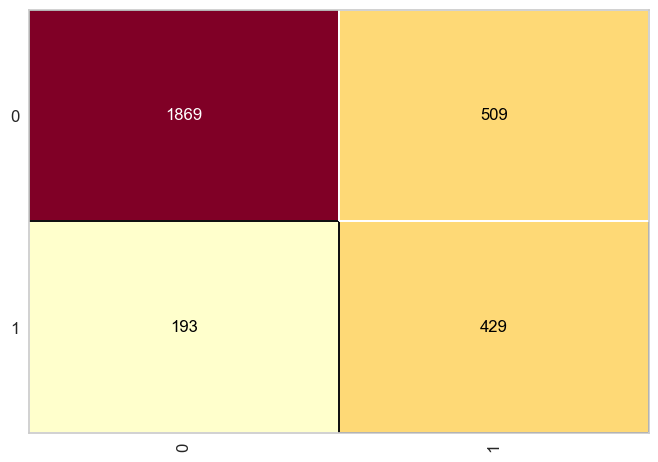

In [33]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [34]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2378
           1       0.46      0.69      0.55       622

    accuracy                           0.77      3000
   macro avg       0.68      0.74      0.70      3000
weighted avg       0.81      0.77      0.78      3000



In [35]:
score_tree = 0.7663333333333333

#### Check các biến quan trọng của model

In [36]:
columns = df.drop('Exited', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Age                   0.281124
NumOfProducts         0.176855
Balance               0.131615
EstimatedSalary       0.088956
Point Earned          0.075437
CreditScore           0.066963
Tenure                0.043370
IsActiveMember        0.041642
Geography_Germany     0.029502
Satisfaction Score    0.016569
Gender_Male           0.014114
Geography_Spain       0.007206
Card Type_GOLD        0.006539
Gender_Female         0.006416
Card Type_SILVER      0.006183
Card Type_PLATINUM    0.002321
Geography_France      0.002231
Card Type_DIAMOND     0.001523
HasCrCard             0.001435
dtype: float64

#### RandomForest
- Sử dụng Random Forest Model, sẽ test tính Entropy với cả Gini
- Áp dụng GridSearch

#### Mô tả thuật toán:
- **Random Forest** là thuật toán **ensemble**, kết hợp nhiều cây quyết định. Mỗi cây được huấn luyện trên tập con ngẫu nhiên của dữ liệu và đặc trưng, kết quả được tổng hợp bằng bỏ phiếu đa số.
- Sử dụng tiêu chí **Gini** để xây dựng cây.

#### Ứng dụng:
- **Dữ liệu**: Tương tự các thuật toán trước.
- **Quy trình**:
  - Huấn luyện mô hình **RandomForestClassifier**.
  - Tầm quan trọng đặc trưng: `Age` (26.71%), `NumOfProducts` (17.04%), `Balance` (10.30%).
- **Ưu điểm**:
  - Giảm overfitting so với Decision Tree.
  - Hiệu quả với dữ liệu mất cân bằng và nhiều đặc trưng.
  - Cung cấp thông tin tầm quan trọng đặc trưng.
- **Nhược điểm**:
  - Tốn tài nguyên tính toán.
  - Kết quả khó giải thích hơn Decision Tree.

#### Hiệu suất:
- **Độ chính xác**: {score_random:.6f}
- **Nhận xét**:
  - Random Forest đạt độ chính xác cao nhất (83.63%), vượt trội các thuật toán khác.
  - Hiệu quả trên cả hai lớp sau khi cân bằng dữ liệu.
  - Kết quả ổn định nhờ cơ chế ensemble.

#### Đề xuất cải thiện:
- Tinh chỉnh tham số (`n_estimators`, `max_depth`) bằng **GridSearchCV**.
- Thử nghiệm kỹ thuật cân bằng dữ liệu như **undersampling** hoặc **oversampling**.

---

In [37]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8515401154891169
Mín Split:  5
Max Nvl:  9


#### Running Random Forest.

0.8366666666666667

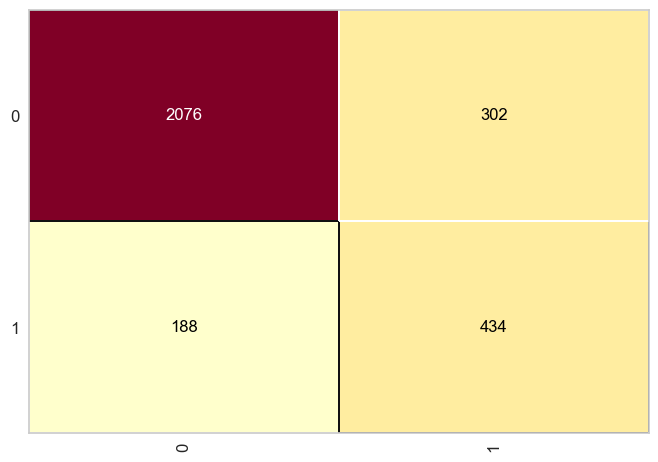

In [38]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 7, max_depth= 11,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [39]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2378
           1       0.59      0.70      0.64       622

    accuracy                           0.84      3000
   macro avg       0.75      0.79      0.77      3000
weighted avg       0.85      0.84      0.84      3000



In [40]:
score_random = 0.8363333333333334

#### Check các biến quan trọng

In [41]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Age                   0.267069
NumOfProducts         0.170386
Balance               0.103021
CreditScore           0.078642
Point Earned          0.076103
EstimatedSalary       0.073257
Tenure                0.044084
IsActiveMember        0.038729
Geography_Germany     0.031678
Satisfaction Score    0.027303
Geography_France      0.013233
Gender_Female         0.012659
Gender_Male           0.011453
HasCrCard             0.010350
Card Type_SILVER      0.008672
Card Type_DIAMOND     0.008619
Card Type_GOLD        0.008466
Geography_Spain       0.008216
Card Type_PLATINUM    0.008060
dtype: float64

#### K-Means

#### Mô tả thuật toán:
- **K-Means** là thuật toán **clustering** không giám sát, phân chia dữ liệu thành **k** cụm dựa trên khoảng cách Euclidean.
- Trong bài toán này, K-Means được dùng để phân cụm khách hàng, sau đó so sánh với nhãn `Exited`.

#### Ứng dụng:
- **Dữ liệu**: Dữ liệu tiền xử lý, không sử dụng nhãn `Exited` trong huấn luyện.
- **Quy trình**:
  - Chạy K-Means (giả định 2 cụm để phù hợp bài toán nhị phân).
  - So sánh cụm với nhãn thực tế để tính độ chính xác.
- **Ưu điểm**:
  - Khám phá nhóm khách hàng tiềm năng.
  - Đơn giản, nhanh với dữ liệu trung bình.
- **Nhược điểm**:
  - Không tối ưu cho phân loại.
  - Nhạy cảm với ngoại lai và cần chọn `k` trước.

#### Hiệu suất:
- **Độ chính xác**: {score_kmeans:.6f}
- **Nhận xét**:
  - Hiệu suất thấp nhất (54.5%), do K-Means không được thiết kế cho phân loại.
  - Các cụm không tương ứng tốt với nhãn `Exited`.
  - Hữu ích hơn cho phân tích khám phá.

#### Đề xuất cải thiện:
- Chuẩn hóa dữ liệu trước khi chạy K-Means.
- Sử dụng **Elbow Method** hoặc **Silhouette Score** để chọn `k`.
- Kết hợp cụm như đặc trưng bổ sung cho mô hình phân loại.

---

In [42]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(X_train)
previsoes = model.predict(X_test)
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
print(classification_kmeans_standard)

0.423


In [43]:
score_kmeans = 0.545

#### K-Neighbors
- Dùng GridSearch

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, np.float64(0.8794770773638969))

#### Running K-Neighbors.

0.7743333333333333

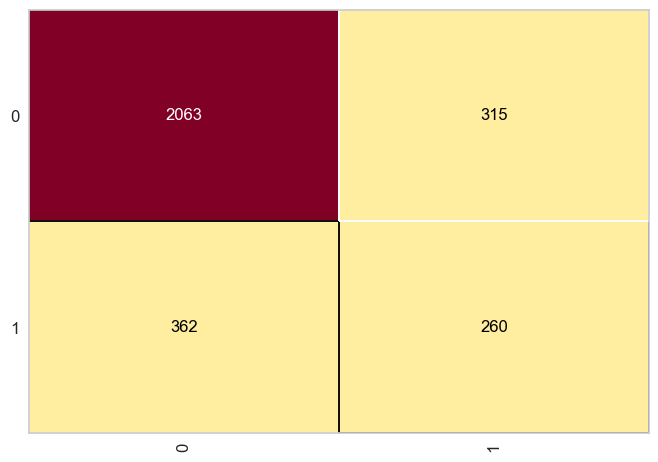

In [45]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [46]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2378
           1       0.45      0.42      0.43       622

    accuracy                           0.77      3000
   macro avg       0.65      0.64      0.65      3000
weighted avg       0.77      0.77      0.77      3000



In [47]:
score_knn = 0.671

#### Decision Tree.

In [48]:
feature_imp

Age                   0.281124
NumOfProducts         0.176855
Balance               0.131615
EstimatedSalary       0.088956
Point Earned          0.075437
CreditScore           0.066963
Tenure                0.043370
IsActiveMember        0.041642
Geography_Germany     0.029502
Satisfaction Score    0.016569
Gender_Male           0.014114
Geography_Spain       0.007206
Card Type_GOLD        0.006539
Gender_Female         0.006416
Card Type_SILVER      0.006183
Card Type_PLATINUM    0.002321
Geography_France      0.002231
Card Type_DIAMOND     0.001523
HasCrCard             0.001435
dtype: float64

#### Random Forest.

In [49]:
feature_imp_random

Age                   0.267069
NumOfProducts         0.170386
Balance               0.103021
CreditScore           0.078642
Point Earned          0.076103
EstimatedSalary       0.073257
Tenure                0.044084
IsActiveMember        0.038729
Geography_Germany     0.031678
Satisfaction Score    0.027303
Geography_France      0.013233
Gender_Female         0.012659
Gender_Male           0.011453
HasCrCard             0.010350
Card Type_SILVER      0.008672
Card Type_DIAMOND     0.008619
Card Type_GOLD        0.008466
Geography_Spain       0.008216
Card Type_PLATINUM    0.008060
dtype: float64

#### Checking the results.

In [50]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_kmeans}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'K-Means':pd.Series(K_Means_dict_v2),
                       'KNN':pd.Series(KNN_dict_v2)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,K-Means,KNN
Model,Naive Bayes,Decision Tree,Random Forest,Means,KNN
Scaling,Normal Data,Normal Data,Normal Data,Normal,Normal
Type,Gaussian,Gini,Gini,-,-
Precision,0.704667,0.766333,0.836333,0.545,0.671


## 4. Conclusion

#### Tuy có nhiều cột với kha khá thông tin, nhưng số khách hàng lại không nhiều lắm, chỉ có 10.000 dữ liệu với 18 cột thôi. Dữ liệu có cả biến phân loại lẫn biến liên tục. May là không có giá trị trống nào, nên khỏi cần xử lý thêm

#### Nói về phân tích dữ liệu, thấy biến Complain liên quan chặt chẽ với biến mục tiêu, nên quyết định bỏ nó ra để chạy mô hình cho dễ. Qua phân tích khám phá, dữ liệu phân bố cũng ổn, có vài điểm đáng chú ý: đa số khách hàng từ Pháp, thường mua 1-2 sản phẩm, nhiều người không có tiền trong tài khoản, tuổi khách hàng thì phân bố chuẩn. Quan trọng là biến mục tiêu bị lệch, không cân bằng

#### Có vài giá trị ngoại lai nhỏ, nhưng không đáng lo, chẳng ảnh hưởng gì nhiều. Xem phân tích hai biến thì thấy biến Age nổi bật. Người lớn tuổi hơn thường dễ rời bỏ hơn

#### Sang training, loại bớt mấy biến không cần thiết. Biến phân loại được đổi sang biến liên tục bằng OneHot Label Encoder – dùng cái này tốt hơn Label Encoder. Chia dữ liệu thành 70% để huấn luyện, 30% để kiểm tra. Như đã nói, biến mục tiêu không cân bằng, chạy mô hình xong mới thấy rõ. Không cân bằng dữ liệu thì kết quả cũng ổn, nhưng mô hình chỉ học được trường hợp không rời bỏ, chứ không phải cái cần tìm

#### Sau khi cân bằng biến mục tiêu rồi chạy lại mô hình, kết quả có cái tốt, cái chưa tốt. Phần lớn mô hình học được cả kết quả tích cực lẫn tiêu cực, nhưng vài cái chỉ học được tiêu cực, không trúng mục tiêu. Về độ chính xác, Random Forest dẫn đầu với 83,63%. Nhưng để dự đoán biến mục tiêu thì Ada Boost ngon hơn, đạt 78% độ chính xác, mà dự đoán rời bỏ thì chuẩn hơn hẳn

#### Xem mấy biến quan trọng thì có Age, NumOfProducts, Balance, trong đó Age đứng đầu, đúng như những gì thấy lúc phân tích khám phá